In [1]:
from itertools import chain

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy


from scipy.sparse.csgraph import laplacian

from sklearn.cluster import SpectralClustering
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import rbf_kernel, cosine_similarity
from sklearn.cluster import SpectralClustering
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score

import feature, utils

In [2]:
# Load data
df_data = pd.read_csv('../data/ice-cat-office-products.csv.gz', dtype=str, index_col=0)

# Filter out small product categories
# top_categories = utils.find_top_n_categories(df_data, top_n=3)
top_categories = [
#     'Folders',                     # N=645
#     'Self-Adhesive Labels',        # N=324
#     'Multimedia Carts & Stands',   # N=317
#     'Calculators',                 # N=305
#     'Writing Notebooks'            # N=300
    'Ring Binders',                # N=298
    'Printer Cabinets & Stands',   # N=252
#     'Whiteboards',                 # N=232
#     'Fax Machines',                # N=210
#     'File Storage Boxes'           # N=192
#     'Binding Covers',              # N=190
#     'Self-Adhesive Note Paper',    # N=172
#     'Staplers',                    # N=162
#     'Desk Trays/Organizers',       # N=159
#     'Board Accessories',           # N=154
#     'Seals',                       # N=145
#     'Computer Desks',              # N=144
#     'Hole Punches',                # N=136
#     'Hanging Folders',             # N=132
#     'Interactive Whiteboards',     # N=131
#     'Laminator Pouches',           # N=128
#     'Stationery Tapes',            # N=124
#     'Bulletin Boards',             # N=123
#     'Tab Indexes',                 # N=114
#     'Folder Binding Accessories',  # N=109
#     'Non-Adhesive Labels',         # N=103
]
df_data = df_data[df_data.category_name.isin(top_categories)]


In [3]:
df_train, df_test = utils.split_train_test(df_data)

In [4]:
df_train.shape

(440, 1230)

In [5]:
feateure_transformer = feature.IceCatFeatureTransformer()

In [6]:
feateure_transformer.fit(df_train)

IceCatFeatureTransformer()

In [7]:
df_train.shape

(440, 1230)

In [8]:
X_train = feateure_transformer.transform(df_train)

In [9]:
X_train.shape

(440, 128)

In [10]:
X_test = feateure_transformer.transform(df_test)

/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Leatherette', 'Polycarbonate'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


In [11]:
X_test.shape

(110, 128)

In [12]:
train_labels = set(df_train.category_name.unique())

In [13]:
test_labels = set(df_test.category_name.unique())

In [14]:
label_encoder = LabelEncoder()

In [15]:
label_encoder.fit(df_train.category_name)

LabelEncoder()

In [16]:
y_train = label_encoder.transform(df_train.category_name)
y_test = label_encoder.transform(df_test.category_name)

In [17]:
model = GaussianProcessClassifier(kernel=1*RBF(1.0))

In [18]:
model.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [19]:
y_test_preds = model.predict_proba(X_test)

In [20]:
y_test_preds.shape

(110, 2)

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds[:,1])

In [22]:
thresholds

array([1.8919913 , 0.8919913 , 0.86342819, 0.86263617, 0.66938802,
       0.31314112, 0.27246889, 0.11945742, 0.11935766, 0.07278543,
       0.07278543])

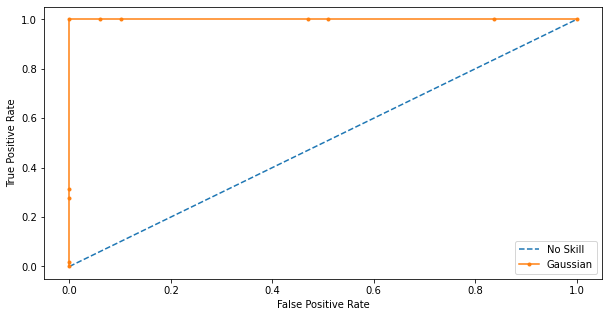

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
ax.plot(fpr, tpr, marker='.', label='Gaussian')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend()

In [24]:
roc_auc = roc_auc_score(y_test, y_test_preds[:,1])
roc_auc

1.0

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_test_proba_lr = lr.predict_proba(X_test)

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_lr[:,1])

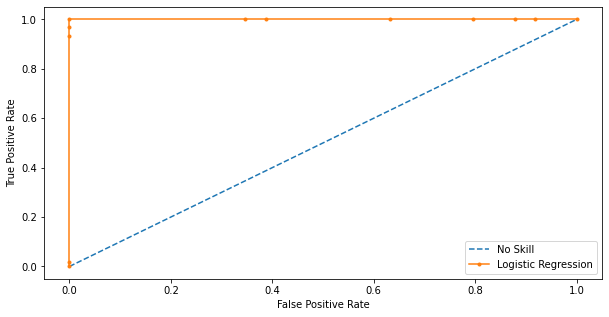

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
ax.plot(fpr, tpr, marker='.', label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend()